In [1]:
import pandas as pd
import numpy as np

In [2]:
housing= pd.read_csv("Housing.csv")

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing.shape

(545, 13)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
housing.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [7]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

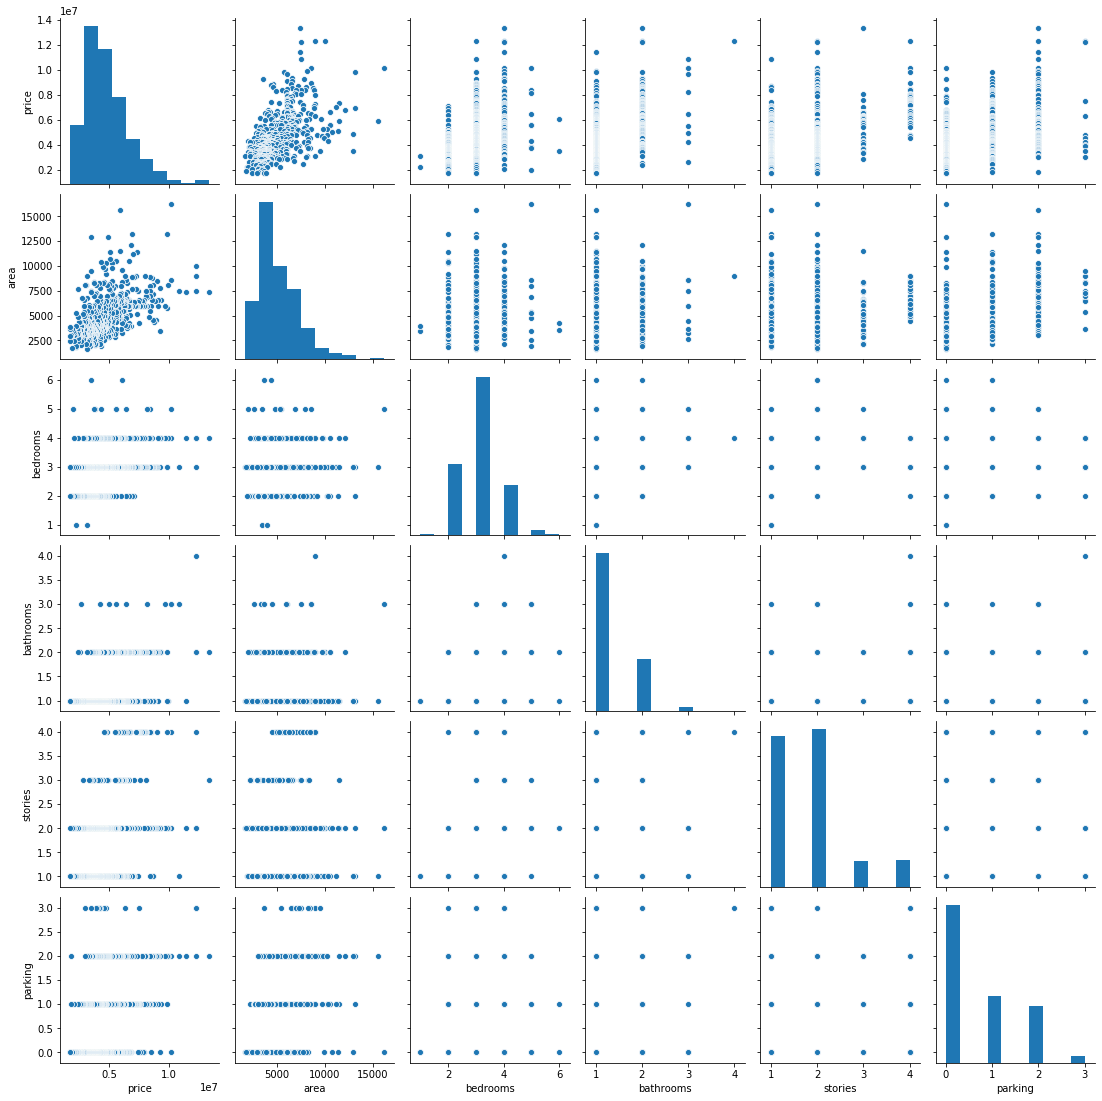

In [8]:
sns.pairplot(housing)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

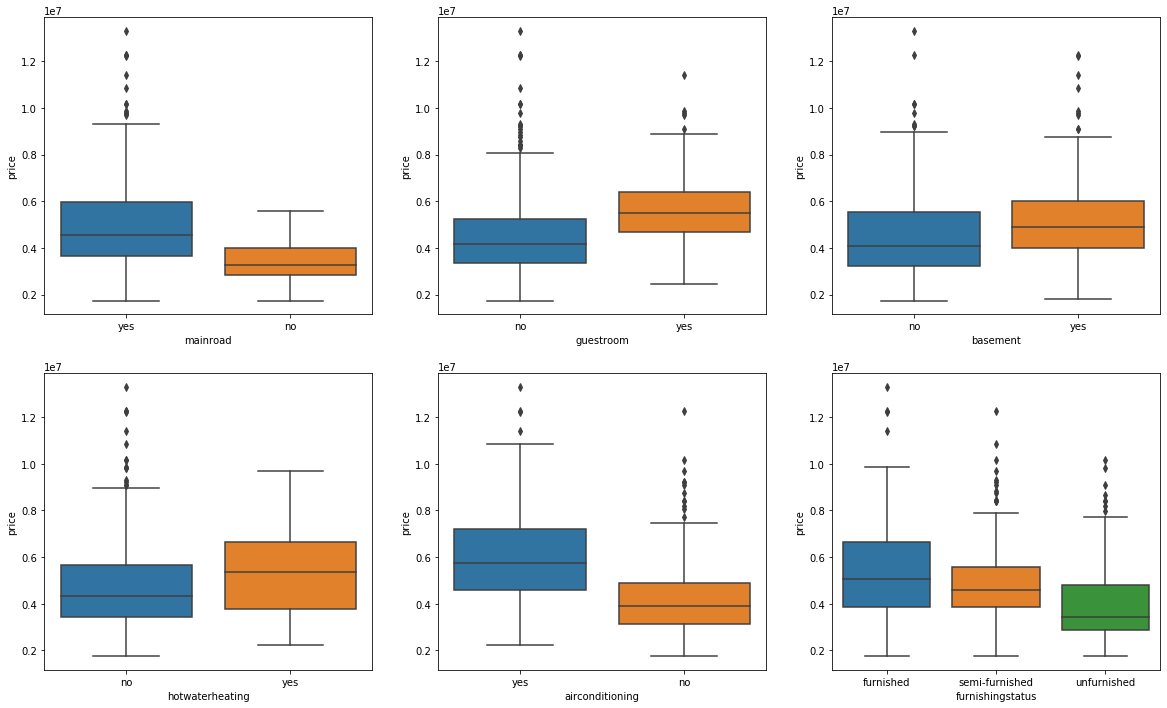

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

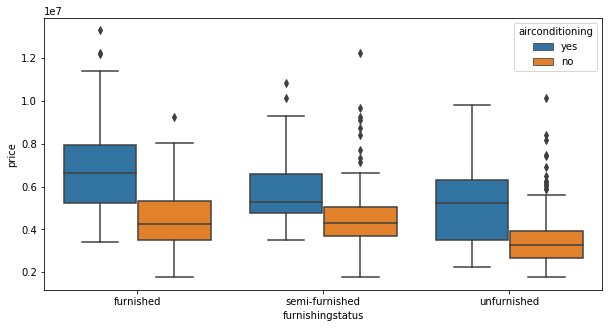

In [10]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

# Step -3 Data preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.
- to build a model we need numerical variables so we will convert important Ivs into numerical which were categorical and its technique known as Dumy variable creation

In [11]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [12]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### Dummy Variables (part of data preparation)
## N--->n-1


-The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. 

-For this, we will use something called `dummy variables`.

In [13]:
status = pd.get_dummies(housing['furnishingstatus'])

In [14]:
status.head()
# its a boolean reperesntation nothing more than that

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [15]:
status1 = pd.get_dummies(housing['mainroad'])
status1.head()

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [16]:
status = pd.get_dummies(housing['furnishingstatus'])
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
housing = pd.concat([housing, status], axis = 1)

In [17]:
# drop the furnishingstatus columns as we have already converted into dummy variable
housing.drop(['furnishingstatus'],axis=1,inplace=True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split. 

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [20]:
df_train.shape

(436, 14)

In [21]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,0,0
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,0,0
91,6419000,6750,2,1,1,1,1,1,0,0,2,1,0,0
118,5950000,6420,3,1,1,1,0,1,0,1,0,1,0,0
472,3010000,3630,4,1,2,1,0,0,0,0,3,0,1,0


In [22]:
df_test.shape

(109, 14)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.
- in linear regression rescaling is not required because the linear will adjust itself


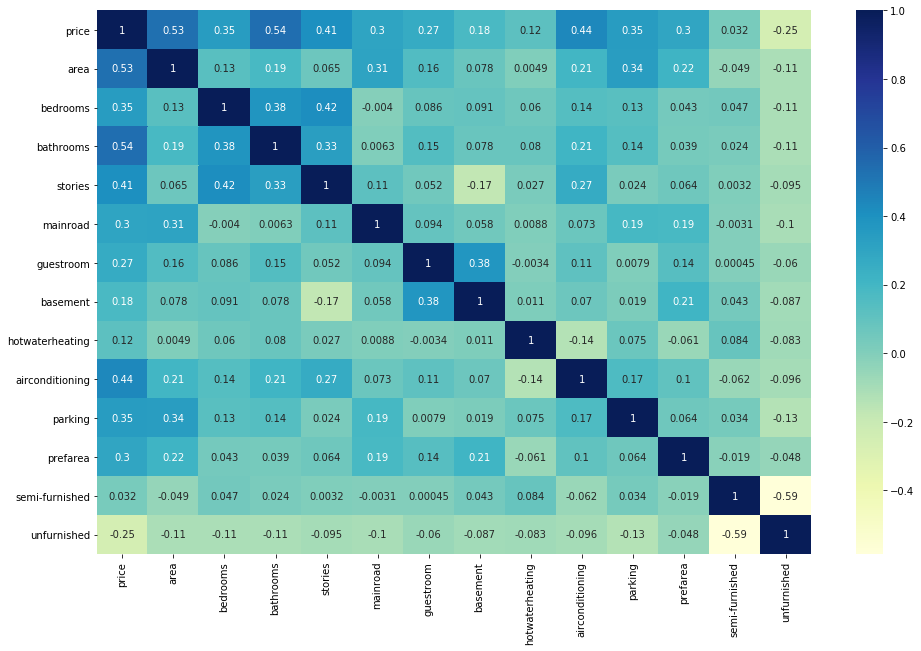

In [23]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

--in negative one question Nishkam
--if we may have more than one variable darker in tone like we have diagonal then it impacts  the prediction
--and it represents the multi- corelation/multi- multicollinearity 
---but if multicolieanrity is high we ignore that feature
---means darker the high correlation 
--- the scale have correlation scale, shows the range of corelation

### Dividing into X and Y sets for the model building 

In [24]:
#specify iv and dv in different dataframe
# we are basically removing the variable for which u have to predict the value.
#and what we need to predict, we need to tell the model taht is why we are removing dependent variable

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

--Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [25]:
# y = b0 + b1x1 - simple linear reg for now
# area adding intercet along xtrain data.

import statsmodels.api as sm

# Add a constant,so basically u have selected a area columns based on that ur model will predict the value, one variable model
X_train_lm = sm.add_constant(X_train[['area']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [26]:
X_train_lm.head()

,const,area
359,1.0,3600
19,1.0,6420
159,1.0,3150
35,1.0,7000
28,1.0,7950


In [27]:
#check the parameter obtained
# constant = b0
# area is b1, 4.596835e+02 is 10 to the power -2
# to get the value in equation we run command lr.params,so that we can get b0 and b1 value.
lr.params


const    2.353148e+06
area     4.697569e+02
dtype: float64

In [28]:
#price = 2.430510 +.459 * area

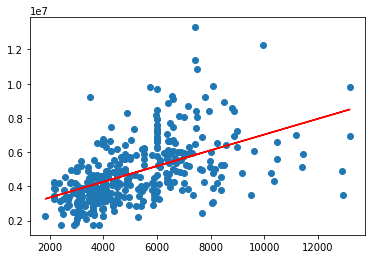

In [29]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 2.430510e+06 + 4.596835e+02*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [30]:
print(lr.summary())
# if p<0.05 then this area column is important for us and we will not drop the variable, so as per null
# null hyposthis we will not reject this varaible


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           3.15e-29
Time:                        10:44:06   Log-Likelihood:                -5968.7
No. Observations:                 381   AIC:                         1.194e+04
Df Residuals:                     379   BIC:                         1.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.353e+06   2.12e+05     11.109      0.0

In [31]:
### Adding another variable

#The R-squared value obtained is `0.283`. 
#Since we have so many variables, we can clearly 
##do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `bathrooms`
## we should  consider all variable in one go and understand that which variables are useless

In [38]:
# Assign all the feature variables to X
# X_train_lm = X_train[['area', 'bathrooms','bedrooms']]
X_train_lm = X_train[['area']]

In [39]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    2.353148e+06
area     4.697569e+02
dtype: float64

In [34]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           3.15e-29
Time:                        10:44:06   Log-Likelihood:                -5968.7
No. Observations:                 381   AIC:                         1.194e+04
Df Residuals:                     379   BIC:                         1.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.353e+06   2.12e+05     11.109      0.0

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. VIFs are calculated by taking a predictor, and regressing it against every other predictor in the model.  It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

1/1-R2

DV, V1,V2,V3 =====> DV = B0+ B1V1 + B2V2 + B3V3

V1 = B0 + B1V2 + B2V3
V2 = B0 + B1V1 + B2V3
V3 = B0 + B1V1 + B2V2 

In [40]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.18
1,area,1.00


In [36]:
#X = X.drop('bedrooms', 1)

In [37]:
### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `bedroom` has a significantly high VIF (`6.6`) and a high p-value (`0.206`) as well. Hence, this variable isn't of much use and should be dropped.

SyntaxError: invalid syntax (<ipython-input-37-4033d8e92efb>, line 3)